In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [2]:
!pip install import_ipynb

You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
import import_ipynb
import func as fd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='/usr/share/fonts/nhn-nanum/NanumGothicBold.ttf').get_name()
rc('font', family=font_name)


In [4]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [5]:
from geoband.API import *

GetCompasData('PJT002_train.csv')
GetCompasData('PJT002_test.csv')
GetCompasData('PJT002_validation.csv')
GetCompasData('PJT002_submission.csv')

train = pd.read_csv('PJT002_train.csv')
val = pd.read_csv('PJT002_validation.csv')
test = pd.read_csv('PJT002_test.csv')
sub = pd.read_csv('PJT002_submission.csv')

/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
c1 = train.columns[172:]
c2 = train.columns[137:151]
c3 = train.columns[17:137]
X_train = train.drop(c1,1)
X_train = X_train.drop(c2,1)
X_train = X_train.drop(c3,1)
X_train['prcpttn'] = X_train['prcpttn'].fillna(-1)

X_val = val.drop(c1,1)
X_val = X_val.drop(c2,1)
X_val = X_val.drop(c3,1)
X_val['prcpttn'] = X_val['prcpttn'].fillna(-1)

test = test.drop(c1,1)
test = test.drop(c2,1)
test = test.drop(c3,1)
test['prcpttn'] = test['prcpttn'].fillna(-1)

y_train = X_train['fr_yn']
X_train = X_train.drop(['fr_yn', 'id'], 1)
y_val = X_val['fr_yn']
X_val = X_val.drop(['fr_yn', 'id'], 1)
test = test.drop(['fr_yn', 'id'], 1)

In [7]:
all_data = pd.concat([X_train, X_val, test],sort=False)

In [8]:
all_na = (all_data.isnull().sum() / len(all_data))*100
all_na = all_na[all_na<50]
all_na = all_na.drop(all_na[all_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : all_na})
missing_data.head(30)

,Missing Ratio
bldng_us_clssfctn,45.822110
bldng_us,42.371188
bldng_archtctr,42.320503
dt_of_athrztn,42.187274
bldng_ar_prc,38.122339
ttl_dwn_flr,17.854143
ttl_grnd_flr,16.433516
lnd_us_sttn_nm,2.913662
rd_sd_nm,2.350335
rgnl_ar_nm2,2.350335


Text(0.5, 1.0, 'Percent missing data by feature')

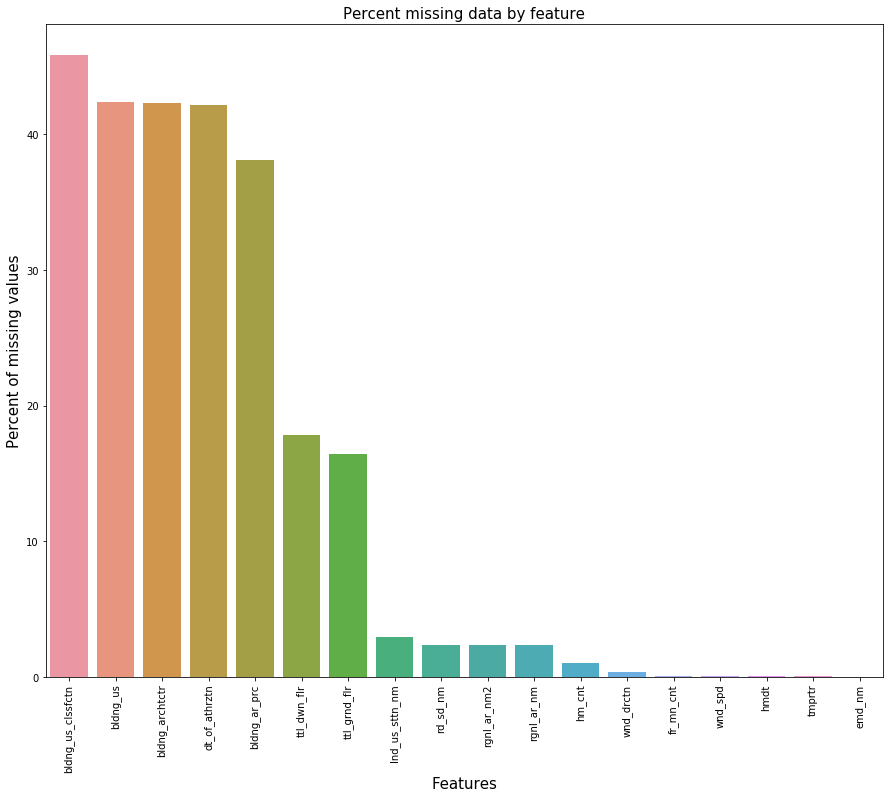

In [9]:
fig, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [10]:
func.dt_of_fr_pp(all_data)
func.dt_of_athrztn_pp(all_data)
func.season_pp(all_data)
func.flr_pp(all_data)
func.fr_wthr_fclt_pp(all_data)
func.bldng_clssfctn_pp(all_data)

/opt/app-root/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,dt_of_fr_yr,dt_of_fr_mth,season,mean_grndflr_per_bldng,mean_dwnflr_per_bldng,sum_grnd_dwn_flr,legality
0,2017-10-20 05:54,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,0.0,...,11322,88,0,2017,10,가을,0.333333,0.0,1.0,legal
1,2018-09-30 08:26,NaN,NaN,3,46.29,46.29,0.0,0,1.0,0.0,...,3369,7727,0,2018,9,가을,0.333333,0.0,1.0,legal
2,2016-10-30 14:57,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,20001104,5.0,0.0,...,12451,72,14,2016,10,가을,5.000000,0.0,5.0,illegal
3,2016-06-14 05:23,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,0.0,...,407,508,11,2016,6,여름,0.500000,0.0,1.0,legal
4,2018-04-22 05:38,NaN,NaN,2,0.00,0.00,0.0,0,NaN,NaN,...,12487,707,0,2018,4,봄,NaN,NaN,NaN,legal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,2018-05-31 19:17,단독주택,철근콘크리트구조,1,122.45,329.55,288.0,20010828,3.0,0.0,...,16240,183,5,2018,5,봄,3.000000,0.0,3.0,legal
2953,2014-10-17 18:20,NaN,NaN,4,52.89,52.89,0.0,0,1.0,0.0,...,3266,590,0,2014,10,가을,0.250000,0.0,1.0,legal
2954,2015-08-25 15:13,단독주택,철근콘크리트구조,1,166.05,466.82,277.3,20120810,3.0,0.0,...,16485,105,4,2015,8,여름,3.000000,0.0,3.0,legal
2955,2015-05-27 23:00,자동차관련시설,경량철골구조,1,250.00,240.00,827.8,20090810,1.0,0.0,...,20055,806,7,2015,5,봄,1.000000,0.0,1.0,legal


In [11]:
train.fr_yn = train.fr_yn.map({'Y':1,'N':0})

In [12]:
train[['bldng_us', 'fr_yn']].groupby(['bldng_us'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)

,bldng_us,fr_yn
3,관광휴게시설,0.700000
24,의료시설,0.666667
26,장례식장,0.666667
33,판매시설,0.653846
1,공동주택,0.619554
15,분뇨.쓰레기처리시설,0.618182
16,수련시설,0.600000
25,자동차관련시설,0.563025
2,공장,0.553011
19,업무시설,0.541985


In [13]:
func.bldng_us_pp(all_data)

In [14]:
train[['bldng_archtctr', 'fr_yn']].groupby(['bldng_archtctr'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)

,bldng_archtctr,fr_yn
13,철골철근콘크리트구조,0.651163
11,일반철골구조,0.408669
14,철골콘크리트구조,0.400000
15,철근콘크리트구조,0.367792
17,프리케스트콘크리트구조,0.357143
2,기타강구조,0.305556
1,경량철골구조,0.290112
16,통나무구조,0.272727
4,기타조적구조,0.261364
3,기타구조,0.259259


In [15]:
func.bldng_archtctr_pp(all_data)

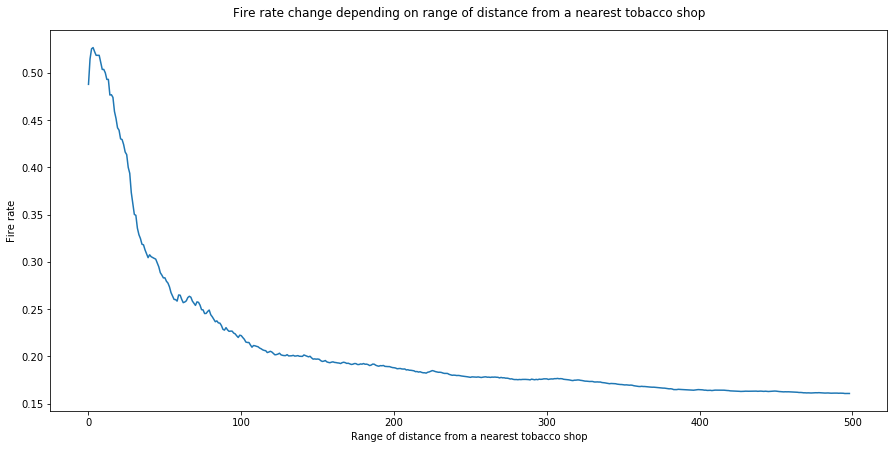

In [16]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['tbc_rtl_str_dstnc'] < i]['fr_yn'].sum() / len(train[train['tbc_rtl_str_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of distance from a nearest tobacco shop', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of distance from a nearest tobacco shop')
plt.show()

In [17]:
train['tbc_rtl_str_dstnc2'] = pd.qcut(train['tbc_rtl_str_dstnc'],4)
train[['tbc_rtl_str_dstnc2', 'fr_yn']].groupby(['tbc_rtl_str_dstnc2'], as_index=False).mean().sort_values(by='tbc_rtl_str_dstnc2', ascending=True)

,tbc_rtl_str_dstnc2,fr_yn
0,"(-0.001, 527.0]",0.158552
1,"(527.0, 2184.0]",0.148922
2,"(2184.0, 4958.0]",0.111734
3,"(4958.0, 23228.0]",0.098148


In [18]:
func.tbc_pp(all_data)

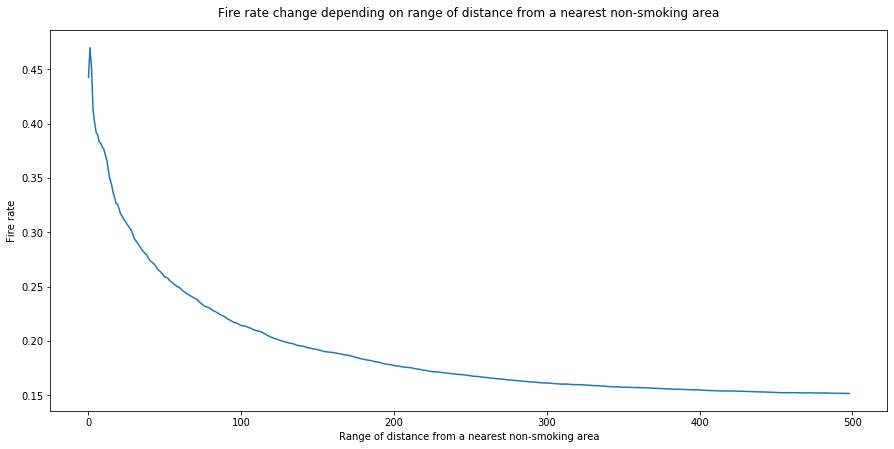

In [19]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['no_tbc_zn_dstnc'] < i]['fr_yn'].sum() / len(train[train['no_tbc_zn_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of distance from a nearest non-smoking area', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of distance from a nearest non-smoking area')
plt.show()

In [20]:
train['no_tbc_zn_dstnc2'] = pd.qcut(train['no_tbc_zn_dstnc'],4)
train[['no_tbc_zn_dstnc2', 'fr_yn']].groupby(['no_tbc_zn_dstnc2'], as_index=False).mean().sort_values(by='no_tbc_zn_dstnc2', ascending=True)

,no_tbc_zn_dstnc2,fr_yn
0,"(-0.001, 115.0]",0.206585
1,"(115.0, 422.0]",0.100569
2,"(422.0, 1486.5]",0.110269
3,"(1486.5, 16164.0]",0.099595


/opt/app-root/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


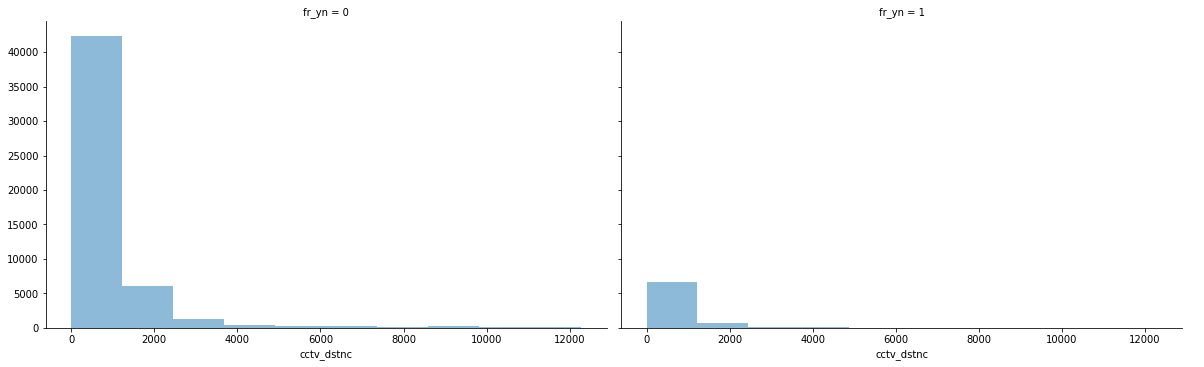

In [21]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'cctv_dstnc', alpha=.5, bins=10)
grid.add_legend()

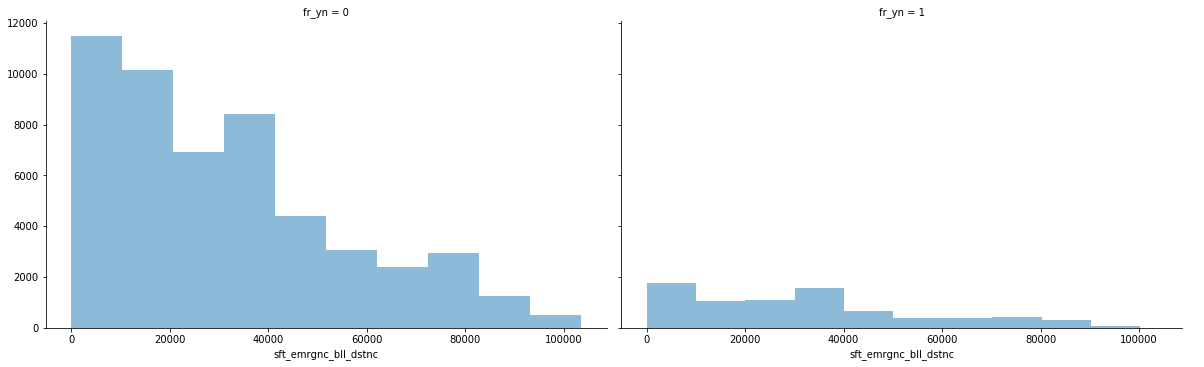

In [22]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'sft_emrgnc_bll_dstnc', alpha=.5, bins=10)
grid.add_legend()

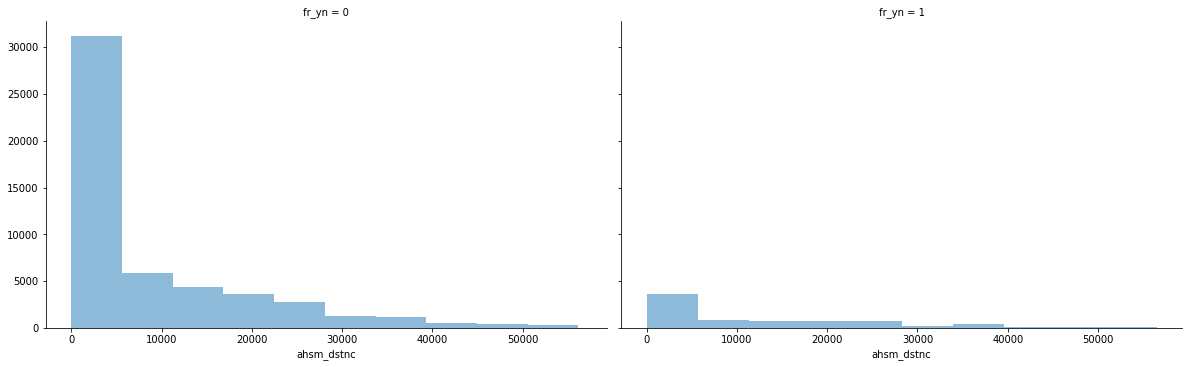

In [23]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'ahsm_dstnc', alpha=.5, bins=10)
grid.add_legend()

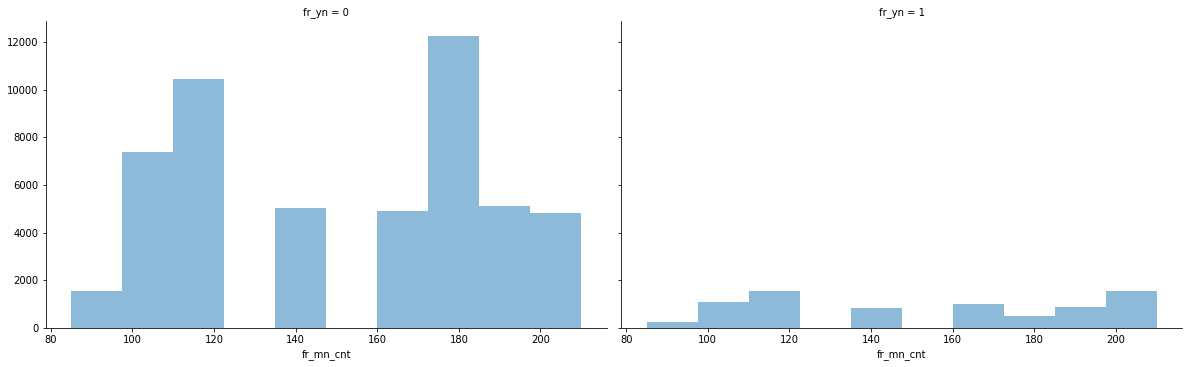

In [24]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'fr_mn_cnt', alpha=.5, bins=10)
grid.add_legend()

In [25]:
all_data.loc[all_data['rgnl_ar_nm2'].isnull(), 'rgnl_ar_nm2'] = '지정되지않음'

In [26]:
func.rgnl_ar_nm_modi(all_data)

,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,bldng_cnt_in_50m,dt_of_fr_yr,dt_of_fr_mth,season,mean_grndflr_per_bldng,mean_dwnflr_per_bldng,sum_grnd_dwn_flr,legality,bldng_us2,bldng_archtctr2
0,2017-10-20 05:54,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,0.0,...,0,2017,10,가을,0.333333,0.0,1.0,legal,상대적분류,석구조
1,2018-09-30 08:26,NaN,NaN,3,46.29,46.29,0.0,0,1.0,0.0,...,0,2018,9,가을,0.333333,0.0,1.0,legal,절대적분류,철골콘크리트구조
2,2016-10-30 14:57,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,20001104,5.0,0.0,...,14,2016,10,가을,5.000000,0.0,5.0,illegal,상대적분류,철골콘크리트구조
3,2016-06-14 05:23,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,0.0,...,11,2016,6,여름,0.500000,0.0,1.0,legal,상대적분류,목구조
4,2018-04-22 05:38,NaN,NaN,2,0.00,0.00,0.0,0,NaN,NaN,...,0,2018,4,봄,NaN,NaN,NaN,legal,절대적분류,철골콘크리트구조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,2018-05-31 19:17,단독주택,철근콘크리트구조,1,122.45,329.55,288.0,20010828,3.0,0.0,...,5,2018,5,봄,3.000000,0.0,3.0,legal,상대적분류,철골콘크리트구조
2953,2014-10-17 18:20,NaN,NaN,4,52.89,52.89,0.0,0,1.0,0.0,...,0,2014,10,가을,0.250000,0.0,1.0,legal,절대적분류,철골콘크리트구조
2954,2015-08-25 15:13,단독주택,철근콘크리트구조,1,166.05,466.82,277.3,20120810,3.0,0.0,...,4,2015,8,여름,3.000000,0.0,3.0,legal,상대적분류,철골콘크리트구조
2955,2015-05-27 23:00,자동차관련시설,경량철골구조,1,250.00,240.00,827.8,20090810,1.0,0.0,...,7,2015,5,봄,1.000000,0.0,1.0,legal,절대적분류,철골콘크리트구조


In [27]:
all_data['rgnl_ar_nm'] = all_data['rgnl_ar_nm'].astype('category')  
# categorycal 타입으로 변경함

In [28]:
func.lnd_us_sttn_nm_modi1(all_data)

In [29]:
all_data['lnd_us_sttn_nm'].unique()


array(['주거용', '임야', '상업.업무용', '공업용', '답', '주.상복합용', '전', '공공용지', nan,
       '특수토지', '기타', '경마장'], dtype=object)

In [30]:
func.lnd_us_sttn_nm_modi2(all_data)

,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,bldng_cnt_in_50m,dt_of_fr_yr,dt_of_fr_mth,season,mean_grndflr_per_bldng,mean_dwnflr_per_bldng,sum_grnd_dwn_flr,legality,bldng_us2,bldng_archtctr2
0,2017-10-20 05:54,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,0.0,...,0,2017,10,가을,0.333333,0.0,1.0,legal,상대적분류,석구조
1,2018-09-30 08:26,NaN,NaN,3,46.29,46.29,0.0,0,1.0,0.0,...,0,2018,9,가을,0.333333,0.0,1.0,legal,절대적분류,철골콘크리트구조
2,2016-10-30 14:57,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,20001104,5.0,0.0,...,14,2016,10,가을,5.000000,0.0,5.0,illegal,상대적분류,철골콘크리트구조
3,2016-06-14 05:23,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,0.0,...,11,2016,6,여름,0.500000,0.0,1.0,legal,상대적분류,목구조
4,2018-04-22 05:38,NaN,NaN,2,0.00,0.00,0.0,0,NaN,NaN,...,0,2018,4,봄,NaN,NaN,NaN,legal,절대적분류,철골콘크리트구조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,2018-05-31 19:17,단독주택,철근콘크리트구조,1,122.45,329.55,288.0,20010828,3.0,0.0,...,5,2018,5,봄,3.000000,0.0,3.0,legal,상대적분류,철골콘크리트구조
2953,2014-10-17 18:20,NaN,NaN,4,52.89,52.89,0.0,0,1.0,0.0,...,0,2014,10,가을,0.250000,0.0,1.0,legal,절대적분류,철골콘크리트구조
2954,2015-08-25 15:13,단독주택,철근콘크리트구조,1,166.05,466.82,277.3,20120810,3.0,0.0,...,4,2015,8,여름,3.000000,0.0,3.0,legal,상대적분류,철골콘크리트구조
2955,2015-05-27 23:00,자동차관련시설,경량철골구조,1,250.00,240.00,827.8,20090810,1.0,0.0,...,7,2015,5,봄,1.000000,0.0,1.0,legal,절대적분류,철골콘크리트구조


In [31]:
func.emd_nm_modi(all_data)

In [32]:
all_data[['emd_nm','emd_nm_big','emd_nm_small']]

,emd_nm,emd_nm_big,emd_nm_small
0,창녕군 창녕읍,창녕군,창녕읍
1,의령군 가례면,의령군,가례면
2,창녕군 창녕읍,창녕군,창녕읍
3,창원시의창구 대산면,창원시의창구,대산면
4,창녕군 창녕읍,창녕군,창녕읍
...,...,...,...
2952,김해시 내외동,김해시,내외동
2953,김해시 진영읍,김해시,진영읍
2954,김해시 내외동,김해시,내외동
2955,김해시 삼안동,김해시,삼안동


In [33]:
func.hm_cnt_modi(all_data)

In [34]:
all_data['hm_cnt'].isnull().sum()

93

In [35]:
all_data.loc[all_data['hm_cnt'].isnull(), 'emd_nm_small'] = round(all_data['hm_cnt'].mean())
# na값 인구 평균으로 치환

In [36]:
all_data['rd_sd_nm'].value_counts()

세로한면(가)    24896
세로한면(불)    16683
소로한면       10990
소로각지        2926
중로한면        2770
세로각지(가)     2370
맹지          2368
중로각지        1948
광대로한면        846
세로각지(불)      729
광대소각         664
지정되지않음       132
광대세각         109
Name: rd_sd_nm, dtype: int64

In [37]:
all_data.loc[all_data['rd_sd_nm'].isnull(), 'rd_sd_nm'] = '세로한면(가)'
# 최빈값으로 na 대체

In [38]:
all_data = all_data.drop('bldng_ar_prc', axis = 1)
# 건물가격 컬럼 삭제

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

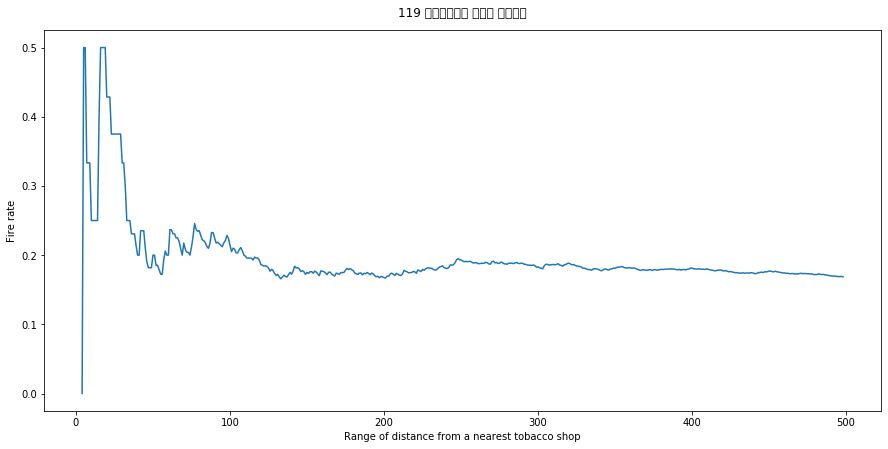

In [39]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['fr_sttn_dstnc'] < i]['fr_yn'].sum() / len(train[train['fr_sttn_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('119 안전센터와의 거리와 화재발생', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of distance from a nearest tobacco shop')
plt.show()

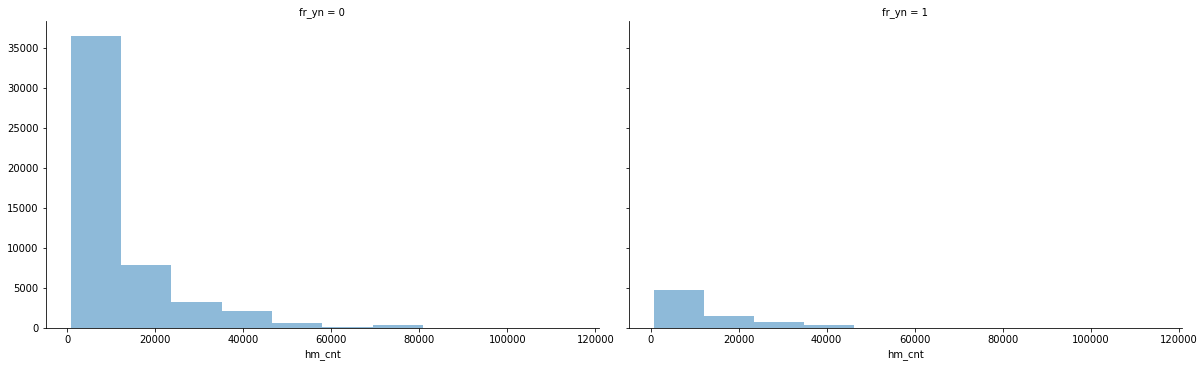

In [40]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'hm_cnt', alpha=.5, bins=10)
grid.add_legend()

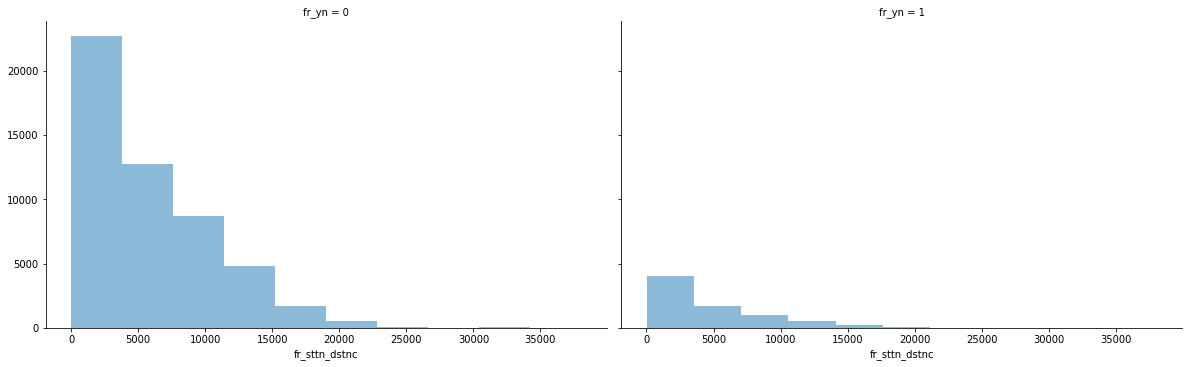

In [41]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'fr_sttn_dstnc', alpha=.5, bins=10)
grid.add_legend()

In [42]:
data=train

In [45]:
fd.dt_of_fr_pp(data)
fd.dt_of_athrztn_pp(data)
fd.season_pp(data)
fd.flr_pp(data)
fd.bldng_us_pp(data)
fd.bldng_archtctr_pp(data)
fd.fr_wthr_fclt_pp(data)
fd.tbc_pp(data)
fd.bldng_clssfctn_pp(data)
fd.ar_pp(data)
fd.rgnl_ar_nm_modi(data)
fd.lnd_us_sttn_nm_modi1(data)
fd.lnd_us_sttn_nm_modi2(data)
fd.emd_nm_modi(data)

/opt/app-root/src/func.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.bldng_ar[(data.bldng_us.notnull())&(data.bldng_ar==0)]=135    #건물면적이 0인데 건물이 존재 -> 건물면적값 중간값(135) 대입
/opt/app-root/lib/python3.6/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [46]:
#건물 승인 연도별 시각화
data['blng_y']=data.loc[:,'dt_of_athrztn'].astype('str').str[:4]
data['blng_y']=data['blng_y'].astype('int')
data['bldng_y']=data['blng_y'].apply(lambda x: 1960 if (x>1959) & (x<1970) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 1970 if (x>1969) & (x<1980) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 1980 if (x>1979) & (x<1990) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 1990 if (x>1989) & (x<2000) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 2000 if (x>1999) & (x<2010) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 2010 if (x>2009) & (x<2020) else x)

(1950, 2020)

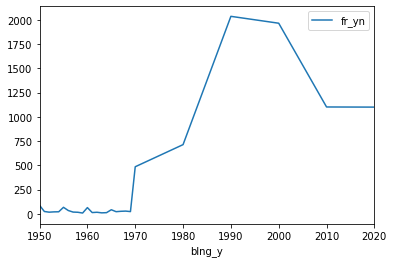

In [47]:
d1=data[['blng_y','fr_yn']]
d2=d1.set_index('blng_y')
d1=d1.pivot_table(index='blng_y', aggfunc='sum')
d2=d1.pivot_table(index='blng_y',aggfunc='sum')
d2.plot()
plt.xlim([1950,2020])

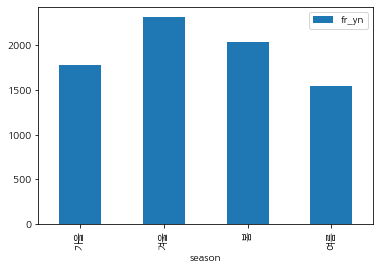

In [57]:
#계절별 화재빈도 시각화
df1=data[['fr_yn','season']]
df2=df1.set_index('season')
df2=df1.pivot_table(index='season', aggfunc='sum')
df2.plot.bar()

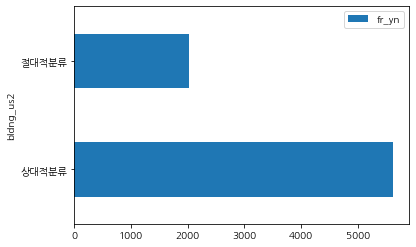

In [58]:
#건물용도별 화재 시각화
da1=data[['bldng_us2','fr_yn']]
da1.drop('fr_yn',axis=1)
da2=da1.pivot_table(index='bldng_us2', aggfunc='sum')
da2.plot.barh()

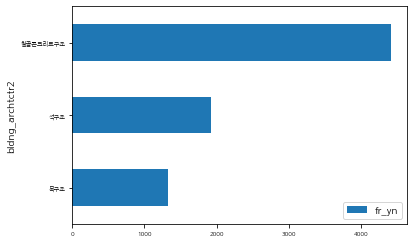

In [59]:
#건물구조별 화재 시각화
dq1=data[['bldng_archtctr2','fr_yn']]
dq2=dq1.pivot_table(index='bldng_archtctr2', aggfunc='sum')
dq2.plot.barh(fontsize=6)

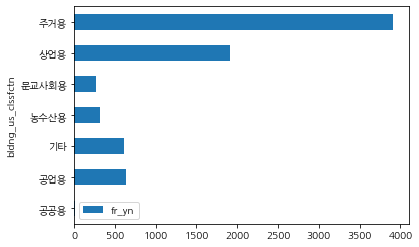

In [60]:
#건물 용도명 화재 시각화
dw1=data[['bldng_us_clssfctn','fr_yn']]
dw2=dw1.pivot_table(index='bldng_us_clssfctn', aggfunc='sum')
dw2.plot.barh()

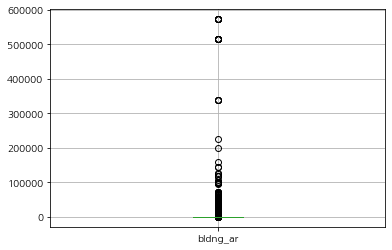

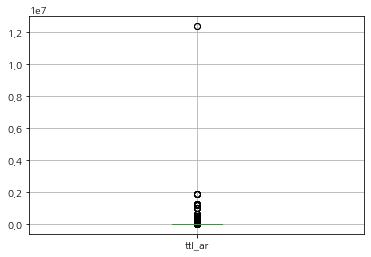

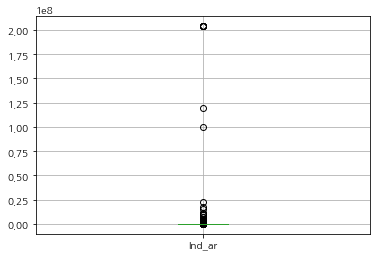

In [61]:
#건물 건축면적 data.bldng_ar    (건물 1층 바닥면적)
#건물 연면적 data.ttl_ar        (각 층 바닥면적의 합계)
#토지면적 data.lnd_ar           (집을 지을수 있는 땅)

data.boxplot(column=["bldng_ar"])     #이상치 값이 너무 높음 평균값 x -> 결측치 (중간값) 처리
plt.show()

data.boxplot(column=["ttl_ar"])
plt.show()

data.boxplot(column=["lnd_ar"])
plt.show()

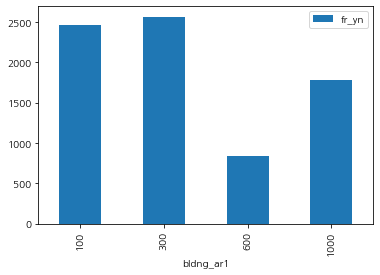

In [62]:
#건물면적 범위 화재 시각화 
data['bldnng_ar1']=data.loc[:,'dt_of_athrztn'].astype('str').str[:4]

data['bldng_ar1']=data['bldng_ar'].apply(lambda x: 100 if (x<101) else x)
data['bldng_ar1']=data['bldng_ar1'].astype('int')
data['bldng_ar1']=data['bldng_ar1'].apply(lambda x: 300 if (x>=101) & (x<301)   else x)
data['bldng_ar1']=data['bldng_ar1'].apply(lambda x: 600 if (x>=301) & (x<601)   else x)
data['bldng_ar1']=data['bldng_ar1'].apply(lambda x: 1000 if (x>=601) & (x<1001) else x)
data['bldng_ar1']=data['bldng_ar1'].apply(lambda x: 1000 if(x>=1001) &(x>1000)  else x)

de1=data[['bldng_ar1','fr_yn']]
de2=de1.pivot_table(index='bldng_ar1', aggfunc='sum')
de2.plot.bar()